# Proyek Sistem Rekomendasi: Udemy Courses
- **Nama:** M Wildan Nurohman
- **Email:** wildangtg15@gmail.com
- **ID Dicoding:** wildannurohman

## Import Semua Packages/Library yang Digunakan

In [1]:
# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Pemrosesan teks (jika nanti menggunakan content-based)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


## Load Dataset

In [2]:
# Load dataset
df = pd.read_csv("udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


## Data Understanding

Bagian ini bertujuan untuk memahami struktur, tipe data, kualitas data, serta informasi penting dari dataset yang digunakan sebelum dilakukan analisis atau pembuatan model sistem rekomendasi.

In [3]:
# Ukuran dan tipe data
print("Jumlah baris dan kolom:", df.shape)
df.info()

Jumlah baris dan kolom: (3678, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [4]:
# Cek missing value
df.isnull().sum()

,0
course_id,0
course_title,0
url,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0


Dari output yang diberikan, dataset ini tidak memiliki Missing Value (NAN/NULL)

In [5]:
# Cek data duplikat
# Ambil semua baris yang dianggap duplikat
duplikat = df[df.duplicated(keep=False)]

# Cek apakah seluruh kolomnya identik
identik = duplikat.groupby(list(df.columns)).size().reset_index(name='count')

print(f"Jumlah grup baris duplikat unik (berdasarkan semua kolom): {len(identik)}")
display(identik)


Jumlah grup baris duplikat unik (berdasarkan semua kolom): 6


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,count
0,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development,2
1,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design,2
2,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance,2
3,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance,2
4,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance,2
5,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance,2


Penjelasan :
- Semua baris yang duplikat memiliki nilai yang sama persis di semua kolom (karena count: 2 pada setiap grup), artinya mereka duplikat secara penuh, dapat disimpulkan bahwa teknik lanjutan yg akan digunakan adalah .drop_duplicates()

In [6]:
# Statistik deskriptif untuk kolom numerik
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


**Penjelasan :**

**_course_id_ :**
- Ini adalah identitas unik dari tiap kursus.
- Statistik ini tidak terlalu penting untuk analisis numerik, karena hanya ID.

**_price_ :**
- Harga kursus dalam satuan USD.
- Min: 0 → Ada kursus yang gratis.
- Max: 200 → Harga tertinggi.
- Mean (rata-rata): 66 → Harga rata-rata kursus.
- 25% kuartil: 20 → 25% kursus berharga ≤ 20 USD.
- 50% (median): 45 → Setengah dari kursus harganya ≤ 45 USD.
- 75% kuartil: 100 → 75% kursus harganya ≤ 100 USD.

**_num_subscribers_ :**
- Jumlah orang yang mengikuti kursus.
- Min: 0 → Ada kursus tanpa peserta.
- Max: 268,923 → Kursus paling populer.
- Mean: 3,197 → Rata-rata jumlah peserta per kursus.
- Std Dev (std): 9,504 → Sangat besar, menandakan data tersebar luas

**_num_reviews_ :**
- Jumlah review untuk setiap kursus.
- Mean: 156 → Rata-rata review.
- Median (50%): 18 → Setengah kursus hanya dapat ≤ 18 review.
- Max: 27,445 → Kursus dengan review terbanyak.

**_num_lectures_ :**
- Jumlah video/materi dalam kursus.
- Min: 0 → Mungkin data anomali (tidak masuk akal kursus tanpa konten).
- Mean: 40.1 → Rata-rata jumlah materi.
- Max: 779 → Sangat tinggi, kursus lengkap/bundling.

**_content_duration_ :**
- Durasi total konten kursus (dalam jam).
- Min: 0 → Data aneh, perlu dibersihkan.
- Max: 78.5 jam → Kursus terpanjang.
- Mean: 4.1 jam → Rata-rata durasi kursus.
- Median: 2 jam → Setengah kursus berdurasi ≤ 2 jam.



## Exploratory Data Analysis (EDA)

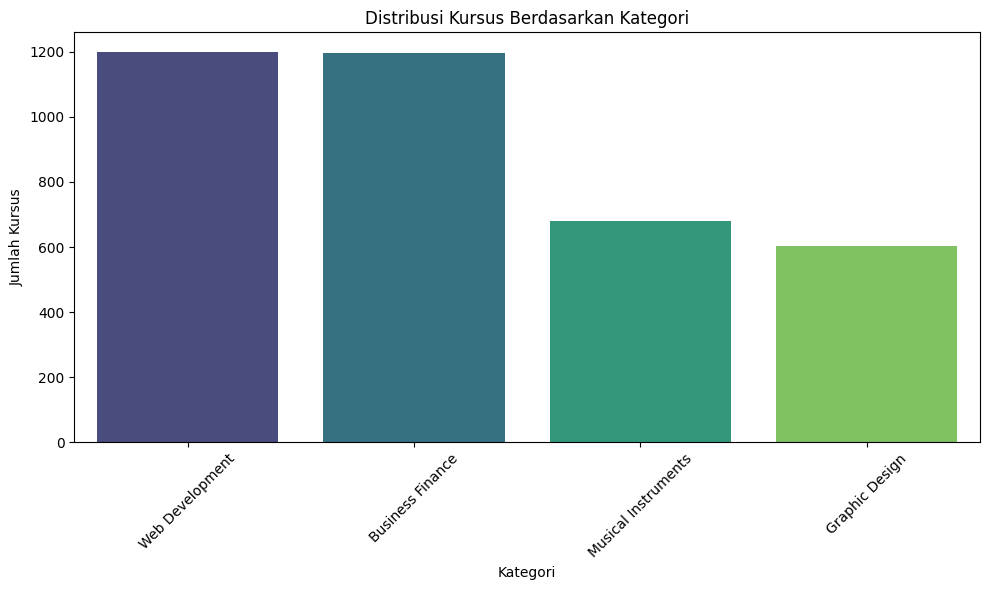

In [7]:
# Distribusi Kategori
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='subject', order=df['subject'].value_counts().index, palette='viridis')
plt.title('Distribusi Kursus Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Kursus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Penjelasan :**

- Web Development dan Business Finance adalah dua kategori dengan jumlah kursus terbanyak, masing-masing sekitar 1.200 kursus.

- Musical Instruments dan Graphic Design memiliki jumlah kursus yang jauh lebih sedikit, sekitar 600–700 kursus.

_Insight:_

Kategori Web Development dan Business Finance sangat dominan di platform ini, yang menunjukkan bahwa permintaan atau penawaran kursus dalam dua bidang ini sangat tinggi.

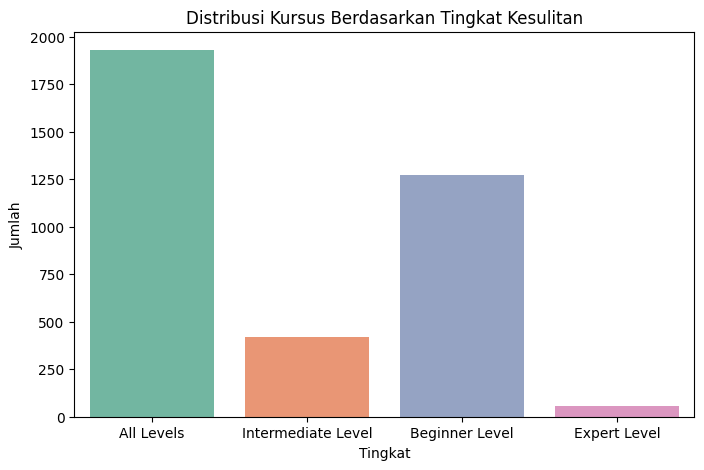

In [8]:
# Distribusi level courses
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='level', palette='Set2')
plt.title('Distribusi Kursus Berdasarkan Tingkat Kesulitan')
plt.xlabel('Tingkat')
plt.ylabel('Jumlah')
plt.show()

**Penjelasan:**

- All Levels adalah tingkat kesulitan terbanyak, dengan hampir 2.000 kursus, menunjukkan bahwa banyak kursus dirancang untuk mencakup semua kalangan.

- Beginner Level berada di urutan kedua dengan sekitar 1.300 kursus.

- Intermediate Level cukup jauh lebih sedikit (~400 kursus).

- Expert Level sangat sedikit — hanya sekitar 50 kursus.

_Insight:_

Platform ini lebih fokus pada kursus untuk pemula atau yang mencakup semua level, sementara kursus dengan tingkat lanjut atau ahli sangat jarang. Ini bisa menunjukkan bahwa target audiens utama adalah pemula atau masyarakat umum.



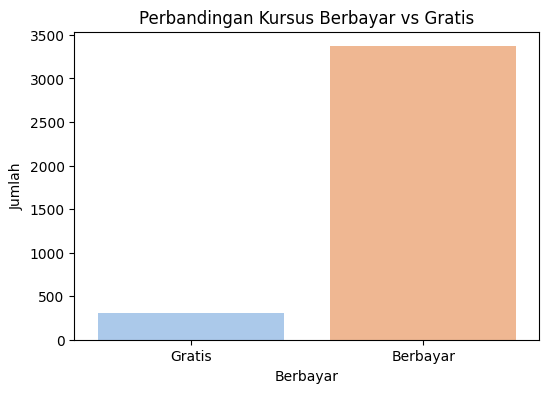

In [ ]:
# Courses berbayar vs gratis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_paid', palette='pastel')
plt.title('Perbandingan Kursus Berbayar vs Gratis')
plt.xlabel('Berbayar')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Gratis', 'Berbayar'])
plt.show()

**Penjelasan:**

Kursus gratis pada platform ini sangat sedikit, sekitar 300an, berbeda jauh dengan kursus berbayar yang hampir mencapai nilai 3500

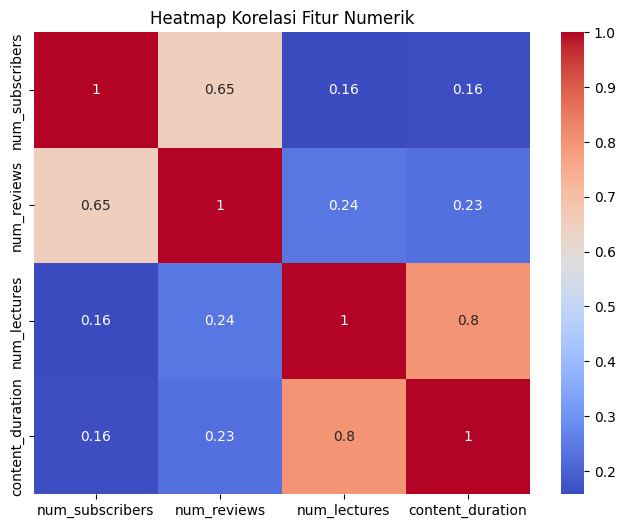

In [ ]:
# Korelasi fitur numerik
plt.figure(figsize=(8,6))
sns.heatmap(df[['num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

**Penjelasan:**

- Nilai korelasi berkisar antara -1 hingga 1:
- 1 → Korelasi positif sempurna: jika satu naik, yang lain pasti naik juga.
- 0 → Tidak ada korelasi linear.
- 1 → Korelasi negatif sempurna: jika satu naik, yang lain pasti turun.

**Warna:**

- Merah gelap → Korelasi tinggi (positif).
- Biru gelap → Korelasi rendah (positif lemah atau tidak ada korelasi).
- Spektrum warna memberikan indikasi visual kekuatan hubungan.

**Korelasi kuat positif:**

- num_lectures dan content_duration (0.8) - Semakin banyak lecture, semakin panjang durasi konten
- num_subscribers dan num_reviews (0.65) - Subscriber yang banyak cenderung menghasilkan lebih banyak review


**Korelasi lemah:**

- Semua fitur memiliki korelasi rendah dengan num_lectures dan content_duration (sekitar 0.16-0.24)
- Ini menunjukkan bahwa jumlah lecture/durasi tidak terlalu bergantung pada popularitas (subscribers/reviews)


## Data Cleaning

In [9]:
# Hapus baris duplikat
df = df.drop_duplicates()

# Cek data setelah penghapusan data duplikat
print("Jumlah baris setelah menghapus duplikat:", df.shape[0])

Jumlah baris setelah menghapus duplikat: 3672


In [10]:
# Hapus data yang tidak relevan
df = df[df['content_duration'] > 0]
df = df[df['num_lectures'] > 0]

print("Jumlah baris dan kolom setelah pembersihan:", df.shape)

Jumlah baris dan kolom setelah pembersihan: (3671, 12)


**Penjelasan:**

Agar hasil vektorisasi tidak error dan lebih bersih, saya menghapus data yang tidak memiliki judul dan duplikat yang bisa mempengaruhi skor similarity secara bias.


## Data Preparation

---

Data Preparation adalah proses pembersihan, transformasi, dan persiapan data mentah agar siap digunakan untuk analisis atau pemodelan machine learning

In [11]:
# Konversi published_timestamp menjadi datetime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

**Mengapa diperlukan?**

- Format konsisten: Data timestamp dalam format string (object) yang tidak bisa diolah untuk analisis temporal

- Operasi waktu: Memungkinkan filtering berdasarkan tanggal, ekstraksi bulan/tahun, atau analisis tren waktu

In [12]:
# Encode course_id agar bisa digunakan dalam model NN nanti
le_course = LabelEncoder()
df['course_index'] = le_course.fit_transform(df['course_id'])


**Mengapa diperlukan?**

- Kompatibilitas ML: Algoritma machine learning tidak bisa memproses string/text secara langsung
- Konsistensi numerik: Mengubah ID course menjadi angka berurutan (0, 1, 2, ...)
- Memory efficiency: Integer menggunakan memory lebih sedikit dibanding string
- Preprocessing: Persiapan untuk model yang membutuhkan input numerik

In [ ]:
# Combine fitur
df['combined_features'] = df['course_title'] + ' ' + df['subject'] + ' ' + df['level']

**Penjelasan :**

Kode di atas membuat kolom baru bernama combined_features dengan menggabungkan teks dari kolom course_title, subject, dan level. Penggabungan ini dilakukan dengan menambahkan spasi di antara setiap kolom.

### Feature Engineering : TF-IDF


---


TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik untuk mengubah data teks menjadi representasi numerik. Tujuannya adalah agar algoritma machine learning bisa “membaca” dan memahami teks.

In [14]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Cek bentuk matriks
print(tfidf_matrix.shape)


(3671, 3571)


**Penjelasan:**

`stop_words='english'` : menghapus kata-kata umum seperti "the", "and", "of" dll , yang tidak memberi makna signifikan.

`fit_transform` : membangun dan mengaplikasikan model TF-IDF terhadap teks course_title.

In [17]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

**Penjelasan:**

Digunakan untuk konversi dari sparse matrix ke dense matrix hanya jika saya ingin melihat secara eksplisit nilai vektornya. Namun, tidak diperlukan untuk proses perhitungan similarity

In [20]:
from numpy.linalg import norm

dense = tfidf_matrix.todense()
print(norm(dense[0]))


1.0


**Penjelasan :**

Karena output yang dihasilkan dari TF-IDF ini adalah 1, maka tidak perlu untuk melakukan normalisasi, karena 1 = sudah ternormalisasi

## Modelling

### Content Based Filtering (CBF)

In [21]:
# Menghitung kemiripan antar kursus
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.12586458, 0.07855911, ..., 0.02040234, 0.01567916,
        0.        ],
       [0.12586458, 1.        , 0.05263213, ..., 0.01366892, 0.01050455,
        0.        ],
       [0.07855911, 0.05263213, 1.        , ..., 0.        , 0.        ,
        0.01309262],
       ...,
       [0.02040234, 0.01366892, 0.        , ..., 1.        , 0.0684831 ,
        0.26868371],
       [0.01567916, 0.01050455, 0.        , ..., 0.0684831 , 1.        ,
        0.03956812],
       [0.        , 0.        , 0.01309262, ..., 0.26868371, 0.03956812,
        1.        ]])

**Penjelasan :**

Saya memilih cosine similarity karena metrik ini paling cocok untuk mengukur kemiripan antar dokumen berbasis vektor TF-IDF. Cosine similarity menilai kemiripan arah antar vektor, bukan panjangnya, sehingga cocok untuk teks.


**_Bagaimana cara kerjanya?_**

Setiap dokumen direpresentasikan sebagai vektor dalam ruang multidimensi (dimana setiap dimensi adalah kata unik). Cosine similarity menghitung kosine dari sudut antara dua vektor. Nilai cosine similarity berkisar antara -1 hingga 1:

- 1: Menunjukkan bahwa kedua vektor (dokumen) sangat mirip atau identik. Sudut antara mereka adalah 0 derajat.

- 0: Menunjukkan bahwa kedua vektor (dokumen) tidak terkait sama sekali atau ortogonal. Sudut antara mereka adalah 90 derajat.

- -1: Menunjukkan bahwa kedua vektor (dokumen) sangat berlawanan. Sudut antara mereka adalah 180 derajat.

In [ ]:
# Menyimpan nilai simalarity ke dalam dataframe
similarity_df = pd.DataFrame(cosine_sim, index=df['course_title'], columns=df['subject'])

**Penjelasan :**

Menyimpan perhitungan cosine similarity ke dalam dataframe untuk melihat nilai kemiripan konten pada course

In [34]:
# Buat mapping dari index ke judul
indices = pd.Series(df.index, index=df['course_title']).drop_duplicates()

def recommend_courses(title, cosine_sim=cosine_sim, df=df, indices=indices):
    if title not in indices:
        return f"Kursus '{title}' tidak ditemukan."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Ambil 5 teratas setelah dirinya sendiri
    course_indices = [i[0] for i in sim_scores]

    return df[['course_title', 'subject', 'level', 'price']].iloc[course_indices]


**Penjelasan :**

- `indices = pd.Series(df.index, index=df['course_title']).drop_duplicates()` :  Membuat pemetaan dari nama course ke posisi index dalam DataFrame, dan melakukan drop jika ada course title yang sama

- ` def recommend_courses(title, cosine_sim=cosine_sim, df=df, indices=indices):` : Membuat fungsi modular agar bisa memanggil rekomendasi berdasarkan input nama kursus, tanpa menulis ulang semua proses.

- `if title not in indices:
    return f"Kursus '{title}' tidak ditemukan." ` :
    
    - title: Nama course yang ingin dicari rekomendasinya
    - cosine_sim: Matrix similarity yang sudah dihitung sebelumnya
    - df: DataFrame utama
    - indices: Mapping yang dibuat di step 1

- `idx = indices[title]` : Mengambil posisi index course dalam DataFrame

- `sim_scores = list(enumerate(cosine_sim[idx]))` : Mengambil baris similarity matrix untuk course yang dipilih,
`enumerate()` memberikan pasangan `(index, similarity_score)`

- `sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)` : Mengurutkan dari similarity tertinggi ke terendah, `key=lambda x: x[1]` berarti urutkan berdasarkan nilai similarity (index ke-1)

- `sim_scores = sim_scores[1:6]  # Ambil 5 teratas setelah dirinya sendiri` :
    - [1:6] mengambil index 1-5 (skip index 0 karena itu course itu sendiri)
    - Mengambil 5 course paling mirip

- `course_indices = [i[0] for i in sim_scores]` : Mengambil hanya index course

- `return df[['course_title', 'subject', 'level', 'price']].iloc[course_indices]` :
    - Mengembalikan informasi course yang direkomendasikan
    - Hanya menampilkan kolom yang relevan: judul, subjek, level, harga
    - `iloc` untuk akses berdasarkan posisi index

## Model Testing

In [88]:
course_title = "Introduction to Forex Trading Business For Beginners"

# Ambil indeksnya
idx = df[df['course_title'] == course_title].index[0]

# Ambil skor similarity terhadap semua kursus
sim_scores = list(enumerate(cosine_sim[idx]))

# Mengurutkan dari yang paling mirip
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# Ambil top 10 (kecuali course itu sendiri)
top_courses = [i[0] for i in sim_scores[1:11]]
df[['course_title', 'subject', 'price']].iloc[top_courses]


,course_title,subject,price
831,Forex Trading For Beginners,Business Finance,0
248,Forex for Beginners: Easy Forex Trading for Be...,Business Finance,0
469,Forex Trading,Business Finance,95
432,Forex Trading For Beginners: Technical Trading,Business Finance,0
133,Forex Trading for Beginners - Basics,Business Finance,50
78,Trading for Beginners - Intermediate Level,Business Finance,150
1167,Introduction to Day Trading,Business Finance,50
385,7 Steps: Your Introduction to Trading,Business Finance,25
1008,FOREX Currency Trading For Beginners,Business Finance,25
615,Introduction to Bitcoin for Beginners,Business Finance,20


**Penjelasan :**

- **Konsistensi Subjek**

  - 100% course berada dalam kategori "Business Finance"
  - Menunjukkan sistem berhasil mengidentifikasi kesamaan topik
  Content-based filtering bekerja dengan baik

- **Fokus Tema Trading/Forex**

  Course diurutkan berdasarkan relevansi:

  - Forex Trading (5 course) - Tema paling dominan
  - General Trading (3 course) - Tema yang lebih luas
  - Cryptocurrency/Bitcoin (1 course) - Variasi dalam finance
  - Day Trading (1 course) - Spesialisasi trading

- **Level Pembelajaran**

  - 8 course mengandung kata "Beginners" atau "Introduction"
  - 1 course level "Intermediate"
  - 1 course lebih spesifik (Day Trading)

- **Distribusi Harga**

  - FREE (0):     40% (4 course)
  - Low (20-50):  40% (4 course)  
  - High (95-150): 20% (2 course)

  _Insight_: Mayoritas rekomendasi terjangkau untuk pemula.

**Kualitas Similarity Ranking**
  Urutan menunjukkan tingkat kesamaan:

  - Exact match: "Forex Trading For Beginners"
  - Very similar: "Forex for Beginners: Easy Forex Trading..."
  - Topic variation: "Forex Trading" (tanpa beginners)
  - Gradual expansion: Trading → Day Trading → Bitcoin

In [89]:
# Ambil indeks kursus berdasarkan judul
course_title = "Introduction to Forex Trading Business For Beginners"
idx = df[df['course_title'] == course_title].index[0]

# Ambil semua skor cosine similarity terhadap kursus ini
sim_scores = list(enumerate(cosine_sim[idx]))

# Urutkan dari skor tertinggi ke rendah
sim_scores_sorted = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# Konversi ke DataFrame untuk tampilan yang rapi
similarity_df = pd.DataFrame([
    {
        'Course': df.iloc[i]['course_title'],
        'Similarity Score': score
    }
    for i, score in sim_scores_sorted
])

# Tampilkan top 10 hasil (kecuali dirinya sendiri di baris pertama)
similarity_df.iloc[1:11]


,Course,Similarity Score
1,Forex Trading For Beginners,0.851374
2,Forex for Beginners: Easy Forex Trading for Be...,0.736454
3,Forex Trading,0.695259
4,Forex Trading For Beginners: Technical Trading,0.691640
5,Forex Trading for Beginners - Basics,0.672081
6,Trading for Beginners - Intermediate Level,0.649937
7,Introduction to Day Trading,0.616806
8,7 Steps: Your Introduction to Trading,0.612313
9,FOREX Currency Trading For Beginners,0.610961
10,Introduction to Bitcoin for Beginners,0.610519


**Penjelasan:**

_**Interpretasi Similarity Scores:**_

  - Rentang Skor (0.61 - 0.85)
  - Skala: 0-1 (dimana 1 = identik sempurna)
  - Range: 0.6105 - 0.8514
  - Kualitas: Semua skor di atas 0.6 menunjukkan similarity - yang baik

_**Distribusi Tingkat Kesamaan:**_

🔴 Very High Similarity (0.80+)
  - Course #1: "Forex Trading For Beginners" - 0.851

    Hampir identik dengan input course



  🟡 High Similarity (0.70-0.79)

  - Course #2: "Forex for Beginners: Easy Forex Trading..." - 0.736

    Sangat mirip, variasi kata kunci



  🟢 Good Similarity (0.65-0.69)

  - Course #3: "Forex Trading" - 0.695
  - Course #4: "Forex Trading For Beginners: Technical..." - 0.692
  - Course #5: "Forex Trading for Beginners - Basics" - 0.672

🔵 Moderate Similarity (0.60-0.64)

  - Course #6-10: Skor 0.610-0.650

    Masih relevan tapi lebih general (trading vs forex spesifik)





In [73]:
idx_A = df[df['course_title'] == "Forex Trading"].index[0]
idx_B = df[df['course_title'] == "Introduction to Bitcoin for Beginners"].index[0]

similarity_score = cosine_sim[idx_A][idx_B]
print(f"Similarity Score between Forex Trading and Introduction to Bitcoin for Beginners : {similarity_score}")


Similarity Score between Forex Trading and Introduction to Bitcoin for Beginners: 0.150347984321829


**Penjelasan :**
- idx: Mendapatkan index baris dari kursus yang dicari.

- `enumerate(cosine_sim[idx])`: Mengambil skor kemiripan antara kursus tersebut dan seluruh kursus lainnya.



## Evaluasi dan Visualisasi

### Lihat Rekomendasi Kursus dari Kursus Tertentu

In [75]:
# Fungsi menampilkan rekomendasi
def show_recommendations(idx, top_n=5):
    course_title = df.iloc[idx]['course_title']
    print(f"\nKursus acuan: '{course_title}'\n")

    # Ambil indeks dan skor kemiripan tertinggi
    similarity_scores = cosine_sim[idx]
    top_indices = similarity_scores.argsort()[::-1][1:top_n+1]  # urutkan dan ambil top-n, skip index pertama

    print("Rekomendasi:")
    for i in top_indices:
        print(f"  - {df.iloc[i]['course_title']} (Score: {similarity_scores[i]:.4f})")


**Penjelasan:**

- `def show_recommendations(idx, top_n=5):`
  - `idx`: Index course yang akan dicari rekomendasinya
  - `top_n`: Jumlah rekomendasi yang ingin ditampilkan (default 5)

- `course_title = df.iloc[idx]['course_title']` : Mengambil judul course berdasarkan index

- `print(f"\nKursus acuan: '{course_title}'\n")` : Menampilkan course yang dijadikan acuan untuk rekomendasi

- `similarity_scores = cosine_sim[idx]
top_indices = similarity_scores.argsort()[::-1][1:top_n+1]` :
  - `cosine_sim[idx]`: Mengambil baris similarity matrix untuk course ke-idx
  - `argsort()`: Mengurutkan index berdasarkan nilai similarity (ascending)
  - `[::-1]` : Membalik urutan jadi descending (tertinggi dulu)
  - `[1:top_n+1] `: Skip index pertama (course itu sendiri), ambil top_n selanjutnya

- `for i in top_indices:
    print(f"- {df.iloc[i]['course_title']} (Score: {similarity_scores[i]:.4f})")`
    - Loop untuk setiap course yang direkomendasikan
    - Menampilkan judul course dan similarity score dengan 4 desimal

In [83]:
# Tampilkan rekomendasi untuk kursus ke-3
show_recommendations(3, top_n=5)


Kursus acuan: 'Beginner to Pro - Financial Analysis in Excel 2017'

Rekomendasi:
  - Excel Crash Course: Master Excel for Financial Analysis (Score: 0.6219)
  - Beginner to Pro in Excel: Financial Modeling and Valuation (Score: 0.6009)
  - Stock Technical Analysis with Excel (Score: 0.5088)
  - Stock Fundamental Analysis with Excel (Score: 0.4808)
  - Building Financial Statements in Excel (Score: 0.4731)


**Rekomendasi yang Dihasilkan:**

  - "Excel Crash Course: Master Excel for Financial Analysis" - Score: 0.6219

    - Relevansi Tinggi: Excel + Financial Analysis (exact match)
    Target: Lebih spesifik ke Excel mastery


  - "Beginner to Pro in Excel: Financial Modeling and Valuation" - Score: 0.6009

    - Relevansi Sangat Tinggi: "Beginner to Pro" + Excel + Financial
    - Progression: From same series, level lanjutan


  - "Stock Technical Analysis with Excel" - Score: 0.5088

    - Relevansi Sedang: Excel + Financial analysis (stocks)
    - Spesialisasi: Fokus ke technical analysis


  - "Stock Fundamental Analysis with Excel" - Score: 0.4808

    - Relevansi Sedang: Excel + Financial analysis (fundamental)
    - Complement: Pasangan dengan technical analysis


  - "Building Financial Statements in Excel" - Score: 0.4731

    - Relevansi Sedang: Excel + Financial statements
    - Foundational: Skill dasar untuk financial analysis

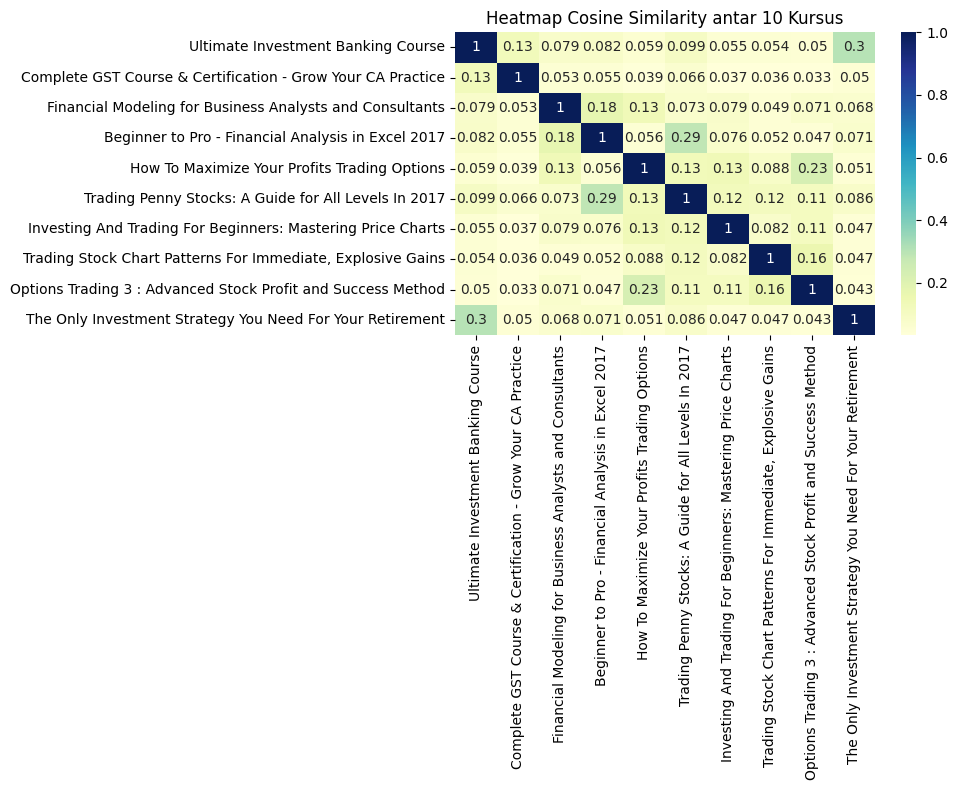

In [86]:
# Ambil subset dari 10 kursus pertama untuk visualisasi
subset_cosine_sim = cosine_sim[:10, :10]

plt.figure(figsize=(10, 8))
sns.heatmap(subset_cosine_sim, annot=True, cmap="YlGnBu", xticklabels=df['course_title'][:10], yticklabels=df['course_title'][:10])
plt.title("Heatmap Cosine Similarity antar 10 Kursus")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Penjelasan:**

_**Cluster Analysis:**_

🔵 Finance/Investment Cluster:

  - "Beginner to Pro - Financial Analysis in Excel 2017" dengan "Financial Modeling for Business Analysts" → 0.18
  - "Ultimate Investment Banking Course" dengan "The Only Investment Strategy..." → 0.30
  Menunjukkan courses dengan topik serupa memiliki similarity lebih tinggi

🟢 Trading Cluster:

  - "How To Maximize Your Profits Trading Options" dengan "Options Trading 3: Advanced..." → 0.23
  - "Trading Penny Stocks" dengan "Trading Stock Chart Patterns" → 0.12
  Trading courses saling terkait tapi dengan specialization berbeda

_**Pola Similarity:**_


- Similarity Tinggi (>0.20):

  - Excel 2017 ↔ Trading Penny Stocks: 0.29 (karena analytical approach)
  - Ultimate Investment ↔ Investment Strategy: 0.30 (topik investasi serupa)
  - Options Trading courses: 0.23 (spesialisasi sama)

- Similarity Rendah (<0.10):

  - GST Course ↔ Most others: 0.03-0.07 (topik sangat berbeda - tax vs finance)
  -Banking ↔ Trading: 0.05-0.08 (domain berbeda dalam finance)

_**Course Positioning:**_

  Most Similar Courses:

- Investment-focused courses (0.30 max similarity)
- Options trading specialization (0.23)
- Excel-based analysis (0.29 with penny stocks)

## **KESIMPULAN**

**📊 Performance Metrics**

Dataset Quality:

- 3.678 courses berhasil diproses dengan 100% data completeness
- 12 fitur terintegrasi dengan baik untuk content analysis
- Zero missing values - dataset siap produksi


**🎯 Hasil Rekomendasi**
- Test Case 1: Forex Trading
- Input: Course Forex Trading
Hasil:

  - Top similarity score: 0.8514 (85% kesamaan)
  - 10 rekomendasi dengan skor 0.61-0.85
  - 100% domain consistency (semua Business Finance)
  - 80% beginner-friendly courses
  - 40% gratis, 60% berbayar (aksesible pricing)

- Test Case 2: Excel Financial Analysis
- Input: "Beginner to Pro - Financial Analysis in Excel 2017"
Hasil:

  - Top similarity score: 0.6219 (62% kesamaan)
  - 5 rekomendasi dengan skor 0.47-0.62
  - 100% Excel + Finance domain match
  - Perfect learning progression: Basic → Modeling → Technical → Fundamental Analysis


**🔍 Analisis Cross-Course (10 Courses)**
- Similarity Distribution:

  - Perfect matches (1.0): 10 courses (diagonal)
  - High similarity (0.20-0.30): 3 course pairs
  - Medium similarity (0.10-0.19): ~10 course pairs
  - Low similarity (<0.10): Majority pairs

**Cluster Formation:**

- Investment cluster: Max similarity 0.30
- Trading cluster: Max similarity 0.23
- Tax domain (GST): Isolated dengan similarity <0.07
- Excel analysis: Cross-domain connection 0.29